In [26]:
import os
import numpy as np
import random
from skimage import io
import imgaug.augmenters as iaa
import imgaug.augmenters.flip as flip
import cv2 as cv2
import cv2
import Augmentor
import keras.utils as image
import matplotlib.pyplot as plt
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [27]:
root = r'C:\Users\harsh\Desktop\Gray_scale'
for i in range(0,16):
    directory_path = os.path.join(root,f'signature_{i+1}')
    if not os.path.exists(directory_path):
        os.mkdir(directory_path)
    else:
        print(f"Directory '{directory_path} already exists")

Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_1 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_2 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_3 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_4 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_5 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_6 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_7 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_8 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_9 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_10 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_11 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_12 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_13 already exists
Directory 'C:\Users\harsh\Desktop\Gray_scale\signature_14 al

In [28]:
data_dir = r'C:\Users\harsh\Desktop\Handwritten Signature Data\Data'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i , directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
rename_folders(data_dir)

In [29]:
def load_and_augment_data(folder_path, num_augmentations=20):
    augmenter = iaa.Sequential([
        iaa.Affine(rotate=(-25, 25), scale=(0.8, 1.2)),
        flip.Fliplr(p=0.5)
    ])

    X = []
    y = []

    classes = os.listdir(folder_path)
    for i, cls in enumerate(classes):
        cls_path = os.path.join(folder_path, cls)
        images = os.listdir(cls_path)
        for img in images:
            img_path = os.path.join(cls_path, img)
            #load the image
            image = io.imread(img_path)
            #apply the augmentation and save the new images
            for j in range(num_augmentations):
                aug_image = augmenter.augment_image(image)
                X.append(aug_image)
                y.append(i)

    X = np.array(X)
    y = np.array(y)

    #Shuffle the data
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    return X, y

In [30]:
load_and_augment_data(data_dir)

(array([[[[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         ...,
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
   

In [31]:
# code for grayscale images

directory = r'C:\Users\harsh\Desktop\Handwritten Signature Data\Data'

gray_path = r'C:\Users\Harsh\Desktop\Gray_scale'

def gray(directory):
    for root, dirs, files, in os.walk(directory):
        for i, directory in enumerate(dirs):
            print(i+1, directory)
            old_dir = os.path.join(root, directory)

            old_gray = os.path.join(gray_path, f'signature_{i+1}')
            for j, file_name in enumerate((os.listdir(old_dir))):
                filename = f'signature_{j+1}.jpg'
                #print(filename)
                img = cv2.imread((os.path.join(old_dir, filename)))# image read for grayscale

                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                cv2.imwrite((os.path.join(old_gray, f'signature_{j+1}.jpg')),gray)
                
            
gray(directory)

1 subject_1
2 subject_10
3 subject_11
4 subject_12
5 subject_13
6 subject_14
7 subject_15
8 subject_16
9 subject_2
10 subject_3
11 subject_4
12 subject_5
13 subject_6
14 subject_7
15 subject_8
16 subject_9


In [32]:
p = Augmentor.Pipeline(gray_path)

Initialised with 159 image(s) found.
Output directory set to C:\Users\Harsh\Desktop\Gray_scale\output.

In [33]:
p.rotate(probability = 0.7,max_left_rotation=10,max_right_rotation=10)

p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)

p.rotate270(probability=0.5)

p.flip_left_right(probability=0.5)

p.flip_top_bottom(probability=0.5)

p.zoom_random(probability=0.5, percentage_area=0.8)

# p.zoom(probability=0.3,min_factor=1.1,max_factor=1.6)

p.skew_left_right(0.5,0.3)

p.skew_top_bottom(0.5,0.5)
p.resize(1,519,276)
p.random_distortion(0.5,4,6,5) #probability, grid width, height,magnitude
p.shear(1,10,11) # prob, max_shear_left, max_shear_right


In [34]:
p.sample(1600)

Processing <PIL.Image.Image image mode=L size=519x276 at 0x1F755B93650>: 100%|██████████| 1600/1600 [00:05<00:00, 293.18 Samples/s]


In [35]:
# To rename Augmented Data

data_dir = r'C:\Users\harsh\Desktop\Gray_scale\output'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))

None


In [36]:
input_folder = r"C:\Users\harsh\Desktop\Gray_scale\output"
splitfolders.ratio (input_folder, output=r"C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_70_30",
                seed=42, ratio=(.80,.20),
                group_prefix=None)

Copying files: 1600 files [00:05, 283.54 files/s]


(519, 276)


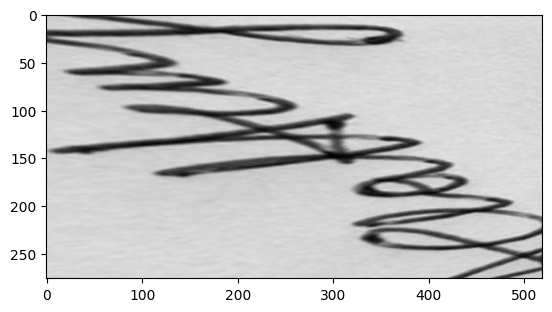

In [37]:
import keras.utils as image
import matplotlib.pyplot as plt
img = image.load_img(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_70_30\train\subject_1\signature_11.jpg')
plt.imshow(img)
print(img.size)

In [38]:
print(cv2.imread(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_70_30\train\subject_1\signature_11.jpg').shape)
cv2.imread(r'C:\Users\harsh\Desktop\Handwritten Signature Data\splitted_gray_data_70_30\train\subject_1\signature_11.jpg')

(276, 519, 3)


array([[[172, 172, 172],
        [169, 169, 169],
        [163, 163, 163],
        ...,
        [218, 218, 218],
        [218, 218, 218],
        [218, 218, 218]],

       [[199, 199, 199],
        [198, 198, 198],
        [195, 195, 195],
        ...,
        [217, 217, 217],
        [218, 218, 218],
        [219, 219, 219]],

       [[209, 209, 209],
        [209, 209, 209],
        [209, 209, 209],
        ...,
        [215, 215, 215],
        [215, 215, 215],
        [216, 216, 216]],

       ...,

       [[214, 214, 214],
        [213, 213, 213],
        [212, 212, 212],
        ...,
        [203, 203, 203],
        [204, 204, 204],
        [205, 205, 205]],

       [[211, 211, 211],
        [210, 210, 210],
        [210, 210, 210],
        ...,
        [207, 207, 207],
        [208, 208, 208],
        [209, 209, 209]],

       [[212, 212, 212],
        [211, 211, 211],
        [211, 211, 211],
        ...,
        [210, 210, 210],
        [210, 210, 210],
        [211, 211, 211]]

In [39]:
#RUN FROM HERE

batch_size=50 #20  #15

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)


In [40]:
train_generator=train_datagen.flow_from_directory('C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_70_30//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

# same generator for validation data

validation_generator=test_datagen.flow_from_directory("C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_70_30//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

Found 1674 images belonging to 16 classes.


Found 1117 images belonging to 16 classes.


In [41]:
batch_size=50

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory('C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_70_30//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    class_mode='categorical'
)

# same generator for validation data
validation_generator=test_datagen.flow_from_directory("C://Users//harsh//Desktop//Handwritten Signature Data//splitted_gray_data_70_30//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    class_mode='categorical'
)

num_samples = len(train_generator)
X_train = []
y_train = []
for i in range(num_samples):
    x_batch, y_batch = next(train_generator)
    X_train.append(x_batch)
    y_train.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

num_samples = len(validation_generator)
x_val = []
y_val = []
for i in range(num_samples):
    x_batch, y_batch = next(validation_generator)
    x_val.append(x_batch)
    y_val.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

Found 1674 images belonging to 16 classes.
Found 1117 images belonging to 16 classes.


# 25 EPOCH

In [42]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 25
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/25
40/40 [==============================] - 5s 123ms/step - loss: 2.8584 - accuracy: 0.0514 - val_loss: 2.7946 - val_accuracy: 0.0743
Epoch 2/25
40/40 [==============================] - 5s 117ms/step - loss: 2.7936 - accuracy: 0.0717 - val_loss: 2.7787 - val_accuracy: 0.0600
Epoch 3/25
40/40 [==============================] - 5s 117ms/step - loss: 2.7820 - accuracy: 0.0705 - val_loss: 2.8003 - val_accuracy: 0.0752
Epoch 4/25
40/40 [==============================] - 5s 114ms/step - loss: 2.7892 - accuracy: 0.0717 - val_loss: 2.7852 - val_accuracy: 0.0654
Epoch 5/25
40/40 [==============================] - 5s 115ms/step - loss: 2.7690 - accuracy: 0.0842 - val_loss: 2.7679 - val_accuracy: 0.1021
Epoch 6/25
40/40 [==============================] - 5s 115ms/step - loss: 2.7654 - accuracy: 0.0908 - val_loss: 2.7669 - val_accuracy: 0.0609
Epoch 7/25
40/40 [==============================] - 4s 112ms/step - loss: 2.7549 - accuracy: 0.0890 - val_loss: 2.7610 - val_accuracy: 0.0797
Epoch 

In [43]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

35/35 [==============================] - 1s 38ms/step - loss: 2.6953 - accuracy: 0.1083
Test Loss: 2.6952502727508545
Test Accuracy: 0.10832587629556656
35/35 [==============================] - 1s 37ms/step


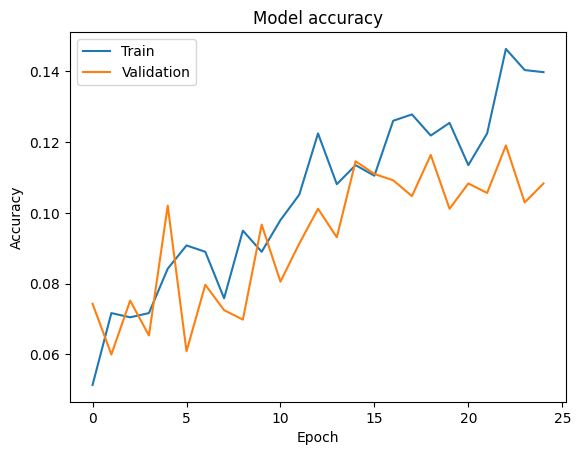

In [44]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


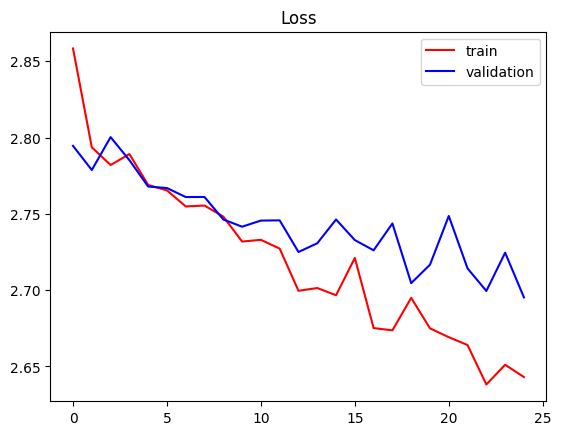

In [45]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

35/35 [==============================] - 1s 37ms/step


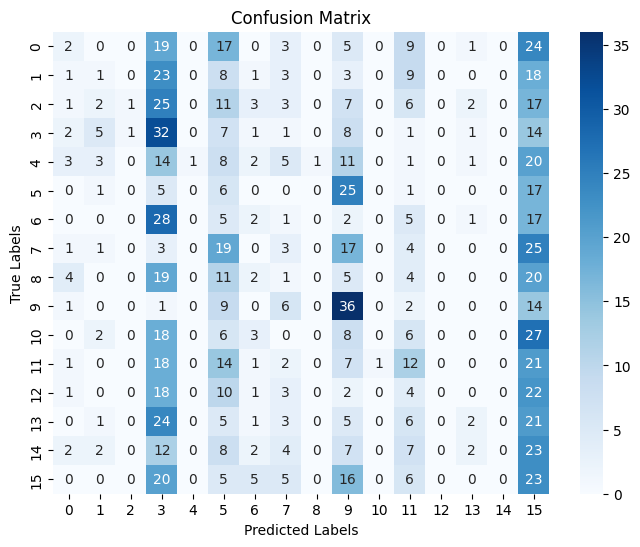

In [46]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [47]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.10517853127229422
Average False Positive Rate (FPR): 0.05957319427496941
Average True Negative Rate (TNR): 0.9404268057250307
Average False Negative Rate (FNR): 0.8948214687277058
Average Precision: 0.16276132651482766
Average Recall: 0.10517853127229422
Average F1-Score: 0.06756037414735698


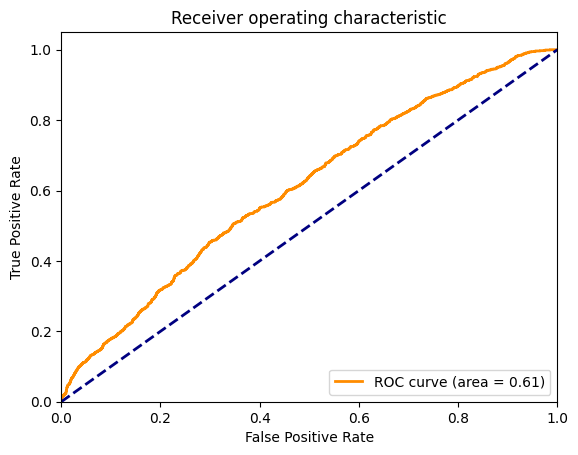

In [48]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 30 EPOCH

In [49]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 30
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/30
40/40 [==============================] - 5s 118ms/step - loss: 2.8551 - accuracy: 0.0538 - val_loss: 2.8234 - val_accuracy: 0.0689
Epoch 2/30
40/40 [==============================] - 5s 124ms/step - loss: 2.7869 - accuracy: 0.0789 - val_loss: 2.7828 - val_accuracy: 0.0788
Epoch 3/30
40/40 [==============================] - 5s 124ms/step - loss: 2.7951 - accuracy: 0.0854 - val_loss: 2.7842 - val_accuracy: 0.0725
Epoch 4/30
40/40 [==============================] - 5s 124ms/step - loss: 2.7757 - accuracy: 0.0896 - val_loss: 2.7690 - val_accuracy: 0.0654
Epoch 5/30
40/40 [==============================] - 5s 125ms/step - loss: 2.7724 - accuracy: 0.0902 - val_loss: 2.7651 - val_accuracy: 0.0743
Epoch 6/30
40/40 [==============================] - 5s 125ms/step - loss: 2.7552 - accuracy: 0.0968 - val_loss: 2.7873 - val_accuracy: 0.0680
Epoch 7/30
40/40 [==============================] - 5s 125ms/step - loss: 2.7647 - accuracy: 0.0753 - val_loss: 2.7537 - val_accuracy: 0.0931
Epoch 

In [50]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

35/35 [==============================] - 1s 39ms/step - loss: 2.7378 - accuracy: 0.1235
Test Loss: 2.737823486328125
Test Accuracy: 0.12354520708322525
35/35 [==============================] - 1s 38ms/step


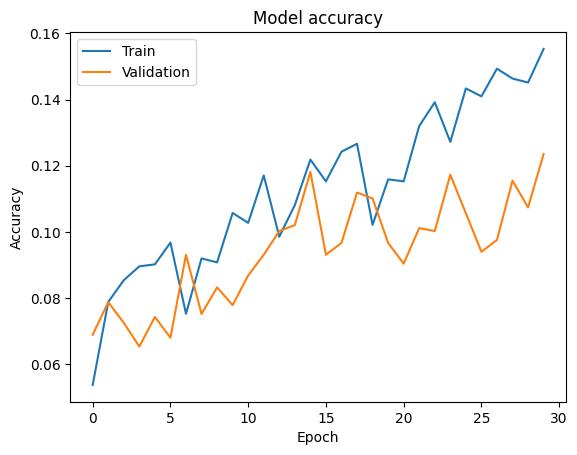

In [51]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


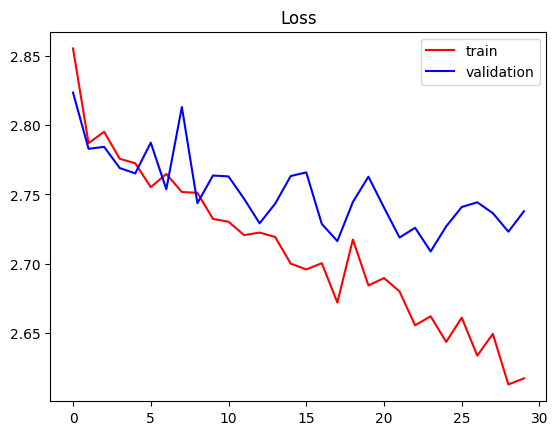

In [52]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

35/35 [==============================] - 1s 37ms/step


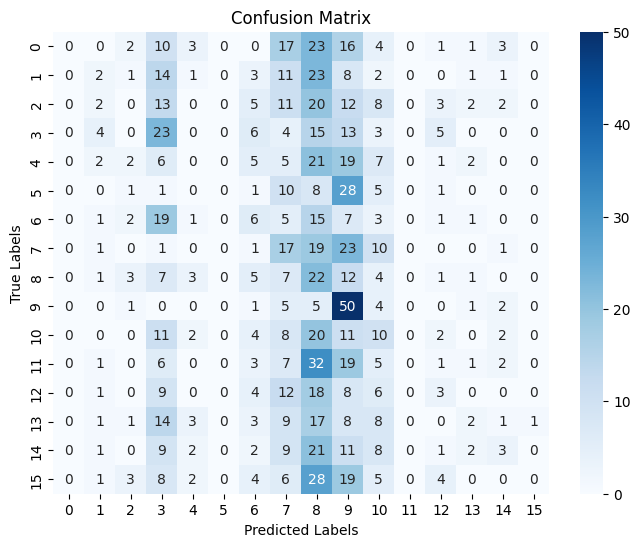

In [53]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [54]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.12494094489250063
Average False Positive Rate (FPR): 0.05837585640274332
Average True Negative Rate (TNR): 0.9416241435972565
Average False Negative Rate (FNR): 0.8750590551074994
Average Precision: 0.08184976365012807
Average Recall: 0.12494094489250063
Average F1-Score: 0.07787139084749078


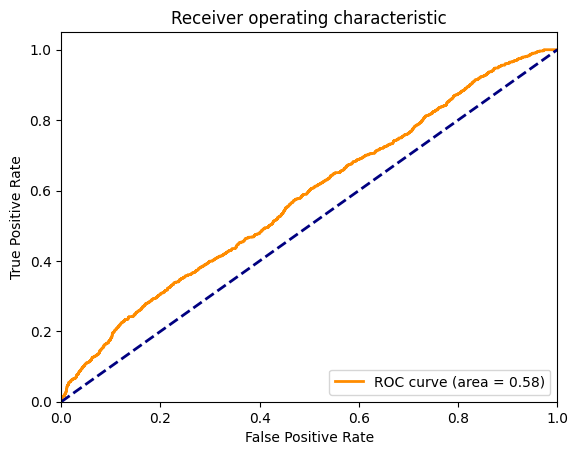

In [55]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 35 EPOCH

In [56]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 35
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/35
40/40 [==============================] - 6s 129ms/step - loss: 2.8558 - accuracy: 0.0651 - val_loss: 2.7815 - val_accuracy: 0.0743
Epoch 2/35
40/40 [==============================] - 5s 123ms/step - loss: 2.7900 - accuracy: 0.0717 - val_loss: 2.7828 - val_accuracy: 0.0824
Epoch 3/35
40/40 [==============================] - 5s 119ms/step - loss: 2.7623 - accuracy: 0.0872 - val_loss: 2.7731 - val_accuracy: 0.0680
Epoch 4/35
40/40 [==============================] - 5s 120ms/step - loss: 2.7701 - accuracy: 0.0878 - val_loss: 2.7583 - val_accuracy: 0.0770
Epoch 5/35
40/40 [==============================] - 5s 120ms/step - loss: 2.7695 - accuracy: 0.0872 - val_loss: 2.7555 - val_accuracy: 0.0850
Epoch 6/35
40/40 [==============================] - 5s 122ms/step - loss: 2.7529 - accuracy: 0.0998 - val_loss: 2.7611 - val_accuracy: 0.0833
Epoch 7/35
40/40 [==============================] - 5s 124ms/step - loss: 2.7462 - accuracy: 0.0944 - val_loss: 2.7580 - val_accuracy: 0.0842
Epoch 

In [57]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

35/35 [==============================] - 1s 38ms/step - loss: 2.7368 - accuracy: 0.0743
Test Loss: 2.7367939949035645
Test Accuracy: 0.0743061751127243
35/35 [==============================] - 1s 37ms/step


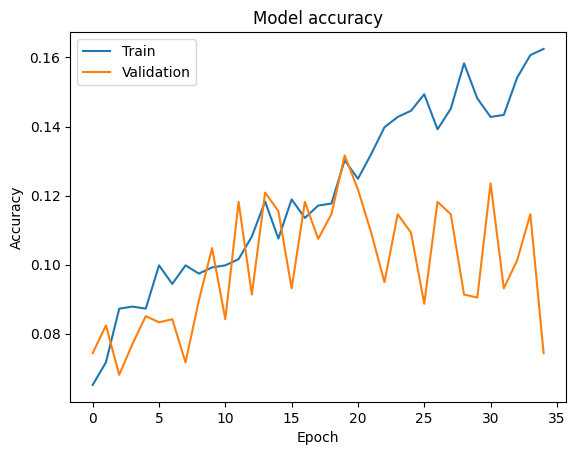

In [58]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


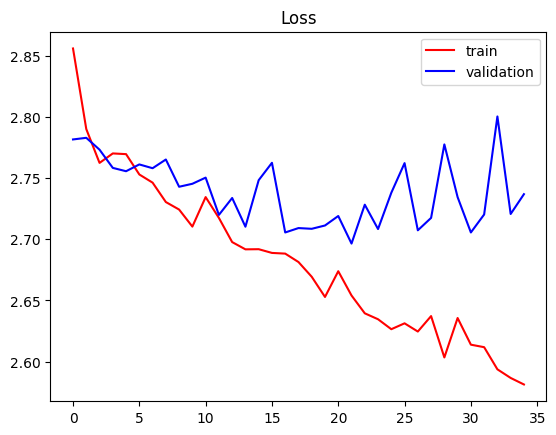

In [59]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

35/35 [==============================] - 1s 37ms/step


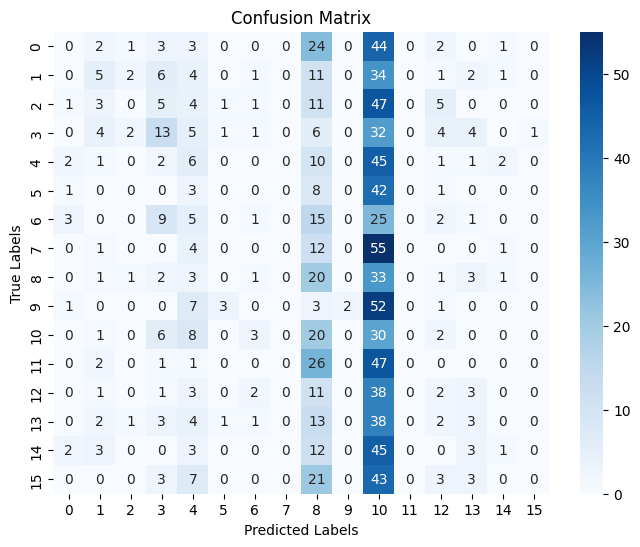

In [60]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [61]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.07542508191035764
Average False Positive Rate (FPR): 0.061665370928822134
Average True Negative Rate (TNR): 0.9383346290711778
Average False Negative Rate (FNR): 0.9245749180896423
Average Precision: 0.1308048596262673
Average Recall: 0.07542508191035764
Average F1-Score: 0.05259546384526408


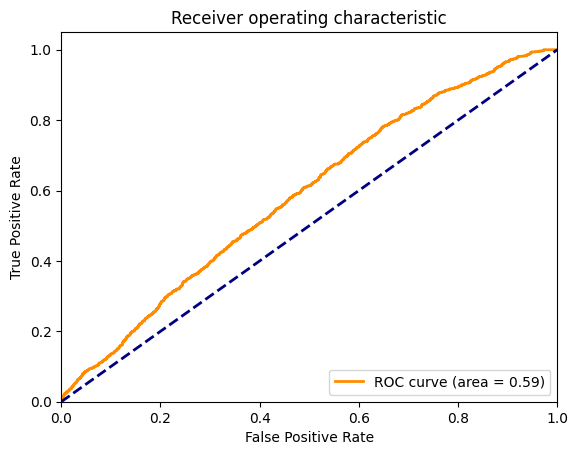

In [62]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 40 EPOCH

In [63]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 40
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/40
40/40 [==============================] - 5s 115ms/step - loss: 2.8577 - accuracy: 0.0556 - val_loss: 2.7948 - val_accuracy: 0.0743
Epoch 2/40
40/40 [==============================] - 4s 113ms/step - loss: 2.7792 - accuracy: 0.0783 - val_loss: 2.7770 - val_accuracy: 0.0689
Epoch 3/40
40/40 [==============================] - 4s 110ms/step - loss: 2.7770 - accuracy: 0.0818 - val_loss: 2.7722 - val_accuracy: 0.0734
Epoch 4/40
40/40 [==============================] - 5s 123ms/step - loss: 2.7729 - accuracy: 0.0920 - val_loss: 2.7551 - val_accuracy: 0.0949
Epoch 5/40
40/40 [==============================] - 5s 119ms/step - loss: 2.7513 - accuracy: 0.0932 - val_loss: 2.7385 - val_accuracy: 0.0958
Epoch 6/40
40/40 [==============================] - 5s 120ms/step - loss: 2.7291 - accuracy: 0.0896 - val_loss: 2.7520 - val_accuracy: 0.0833
Epoch 7/40
40/40 [==============================] - 5s 121ms/step - loss: 2.7329 - accuracy: 0.1057 - val_loss: 2.7609 - val_accuracy: 0.0868
Epoch 

In [64]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

35/35 [==============================] - 1s 37ms/step - loss: 2.7731 - accuracy: 0.1047
Test Loss: 2.773071050643921
Test Accuracy: 0.10474485158920288
35/35 [==============================] - 1s 37ms/step


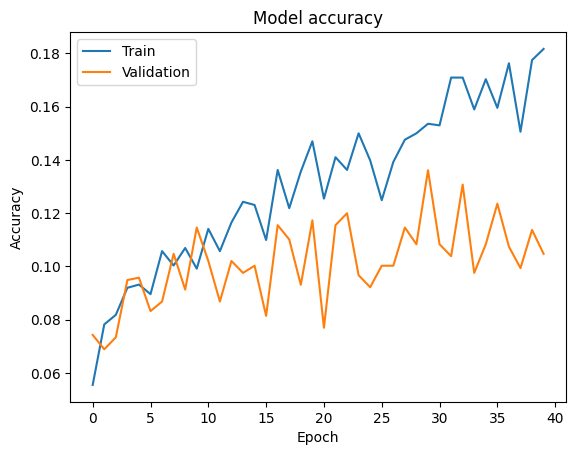

In [65]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


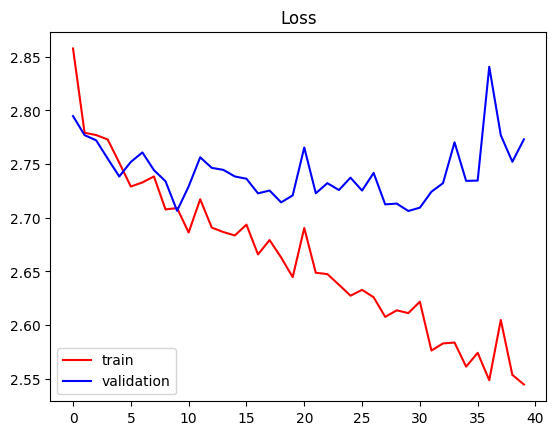

In [66]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

35/35 [==============================] - 1s 38ms/step


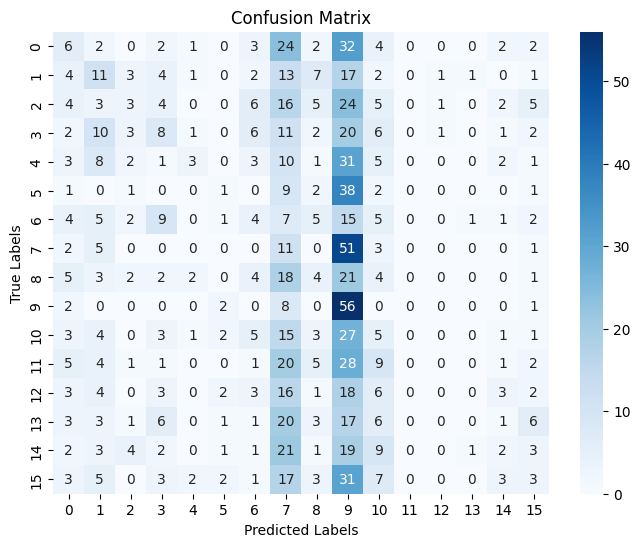

In [67]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [68]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.10466510557826338
Average False Positive Rate (FPR): 0.05972114553383527
Average True Negative Rate (TNR): 0.9402788544661647
Average False Negative Rate (FNR): 0.8953348944217366
Average Precision: 0.09703633467269746
Average Recall: 0.10466510557826338
Average F1-Score: 0.07214589918707709


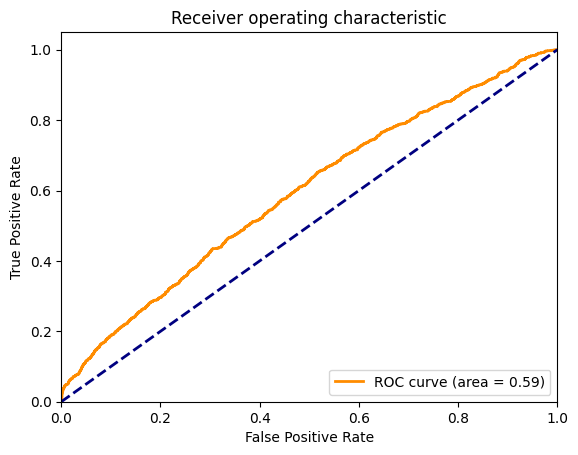

In [69]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 45 EPOCH

In [70]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 45
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/45
40/40 [==============================] - 5s 117ms/step - loss: 2.8691 - accuracy: 0.0597 - val_loss: 2.7659 - val_accuracy: 0.0618
Epoch 2/45
40/40 [==============================] - 5s 114ms/step - loss: 2.7939 - accuracy: 0.0687 - val_loss: 2.7801 - val_accuracy: 0.0761
Epoch 3/45
40/40 [==============================] - 4s 113ms/step - loss: 2.7745 - accuracy: 0.0818 - val_loss: 2.7735 - val_accuracy: 0.0725
Epoch 4/45
40/40 [==============================] - 4s 112ms/step - loss: 2.7706 - accuracy: 0.0896 - val_loss: 2.7497 - val_accuracy: 0.0958
Epoch 5/45
40/40 [==============================] - 4s 112ms/step - loss: 2.7451 - accuracy: 0.0938 - val_loss: 2.7520 - val_accuracy: 0.0904
Epoch 6/45
40/40 [==============================] - 4s 112ms/step - loss: 2.7412 - accuracy: 0.0980 - val_loss: 2.7793 - val_accuracy: 0.0958
Epoch 7/45
40/40 [==============================] - 5s 114ms/step - loss: 2.7421 - accuracy: 0.0998 - val_loss: 2.7431 - val_accuracy: 0.0922
Epoch 

In [71]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

35/35 [==============================] - 1s 39ms/step - loss: 2.7379 - accuracy: 0.1137
Test Loss: 2.7378623485565186
Test Accuracy: 0.11369740217924118
35/35 [==============================] - 1s 38ms/step


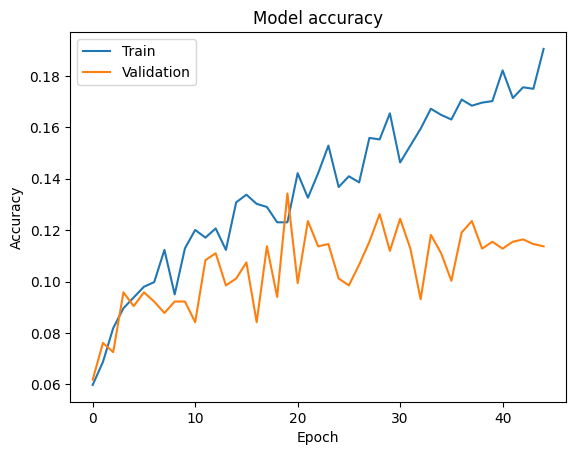

In [72]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


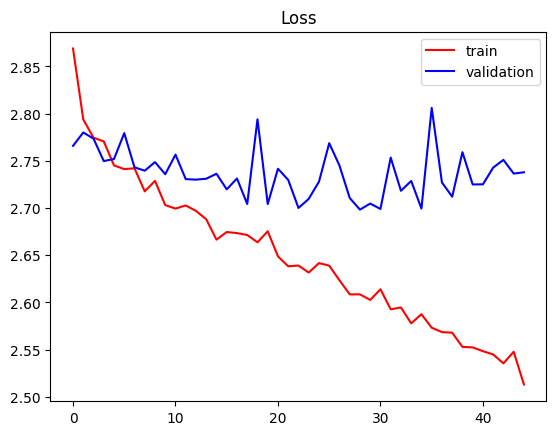

In [73]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

35/35 [==============================] - 1s 40ms/step


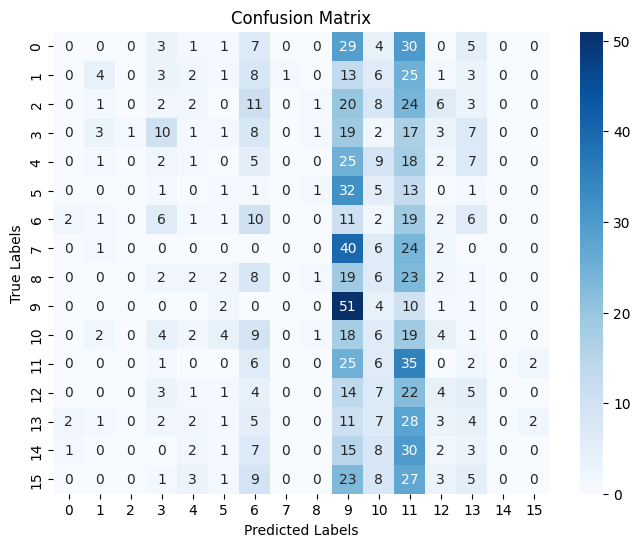

In [74]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [75]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.11325179641885305
Average False Positive Rate (FPR): 0.05914034482959718
Average True Negative Rate (TNR): 0.9408596551704029
Average False Negative Rate (FNR): 0.8867482035811469
Average Precision: 0.08966550503734488
Average Recall: 0.11325179641885305
Average F1-Score: 0.06847142474281437


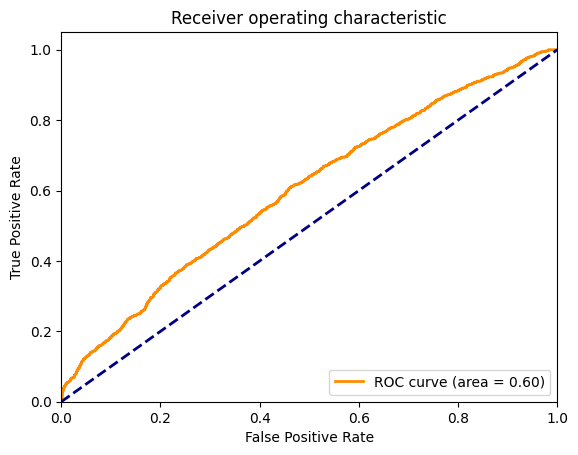

In [76]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 80 EPOCH

In [77]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 80
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/80
40/40 [==============================] - 11s 269ms/step - loss: 2.8644 - accuracy: 0.0615 - val_loss: 2.8217 - val_accuracy: 0.0689
Epoch 2/80
40/40 [==============================] - 13s 339ms/step - loss: 2.8021 - accuracy: 0.0753 - val_loss: 2.7651 - val_accuracy: 0.0734
Epoch 3/80
40/40 [==============================] - 14s 340ms/step - loss: 2.7710 - accuracy: 0.0818 - val_loss: 2.7872 - val_accuracy: 0.0761
Epoch 4/80
40/40 [==============================] - 13s 338ms/step - loss: 2.7727 - accuracy: 0.0789 - val_loss: 2.7600 - val_accuracy: 0.0636
Epoch 5/80
40/40 [==============================] - 13s 338ms/step - loss: 2.7631 - accuracy: 0.0854 - val_loss: 2.7696 - val_accuracy: 0.0806
Epoch 6/80
40/40 [==============================] - 13s 337ms/step - loss: 2.7427 - accuracy: 0.0765 - val_loss: 2.7699 - val_accuracy: 0.0913
Epoch 7/80
40/40 [==============================] - 13s 334ms/step - loss: 2.7425 - accuracy: 0.0866 - val_loss: 2.7507 - val_accuracy: 0.0940

In [78]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

35/35 [==============================] - 3s 71ms/step - loss: 2.8495 - accuracy: 0.1146
Test Loss: 2.849534749984741
Test Accuracy: 0.11459265649318695
35/35 [==============================] - 3s 72ms/step


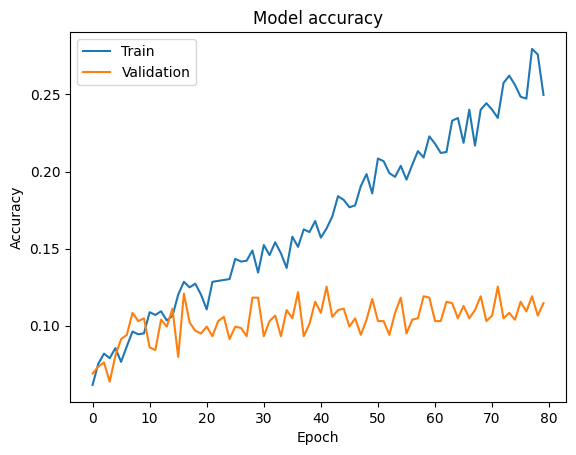

In [79]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


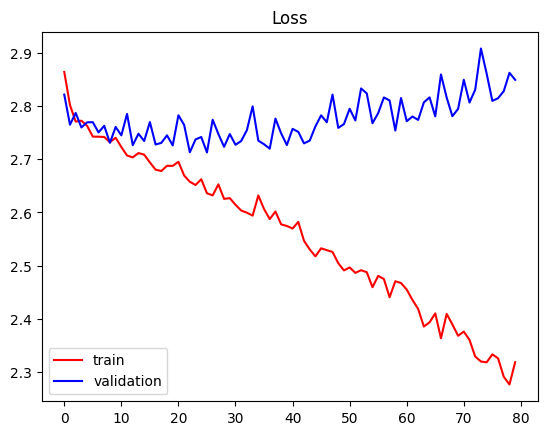

In [80]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

35/35 [==============================] - 3s 75ms/step


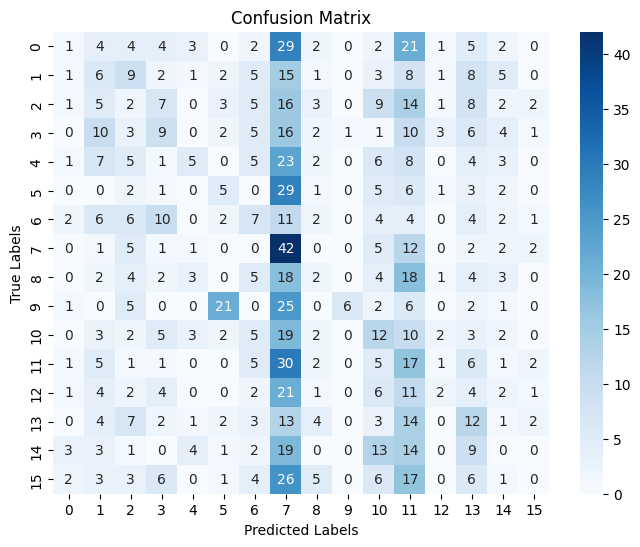

In [81]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [82]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.11388374874142274
Average False Positive Rate (FPR): 0.05912265221953283
Average True Negative Rate (TNR): 0.9408773477804672
Average False Negative Rate (FNR): 0.8861162512585772
Average Precision: 0.15113907888312822
Average Recall: 0.11388374874142274
Average F1-Score: 0.09415405904604751


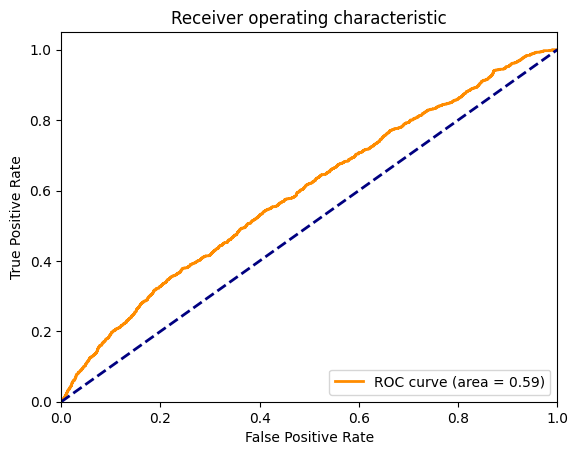

In [83]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# 200 EPOCH

In [84]:
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(16, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

num_epochs = 200
batch_size = 42

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_val, y_val))


Epoch 1/200
40/40 [==============================] - 5s 121ms/step - loss: 2.8761 - accuracy: 0.0609 - val_loss: 2.8039 - val_accuracy: 0.0806
Epoch 2/200
40/40 [==============================] - 5s 117ms/step - loss: 2.7882 - accuracy: 0.0753 - val_loss: 2.7857 - val_accuracy: 0.0645
Epoch 3/200
40/40 [==============================] - 5s 115ms/step - loss: 2.7869 - accuracy: 0.0711 - val_loss: 2.7914 - val_accuracy: 0.0645
Epoch 4/200
40/40 [==============================] - 5s 115ms/step - loss: 2.7718 - accuracy: 0.0848 - val_loss: 2.7621 - val_accuracy: 0.0788
Epoch 5/200
40/40 [==============================] - 5s 113ms/step - loss: 2.7687 - accuracy: 0.0771 - val_loss: 2.7583 - val_accuracy: 0.0698
Epoch 6/200
40/40 [==============================] - 5s 114ms/step - loss: 2.7584 - accuracy: 0.0908 - val_loss: 2.7554 - val_accuracy: 0.0654
Epoch 7/200
40/40 [==============================] - 5s 115ms/step - loss: 2.7521 - accuracy: 0.0860 - val_loss: 2.7878 - val_accuracy: 0.0886

In [85]:
# Evaluate the RNN model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the RNN model
predictions = model.predict(x_val)

35/35 [==============================] - 1s 38ms/step - loss: 3.1062 - accuracy: 0.1298
Test Loss: 3.106196403503418
Test Accuracy: 0.12981200218200684
35/35 [==============================] - 1s 38ms/step


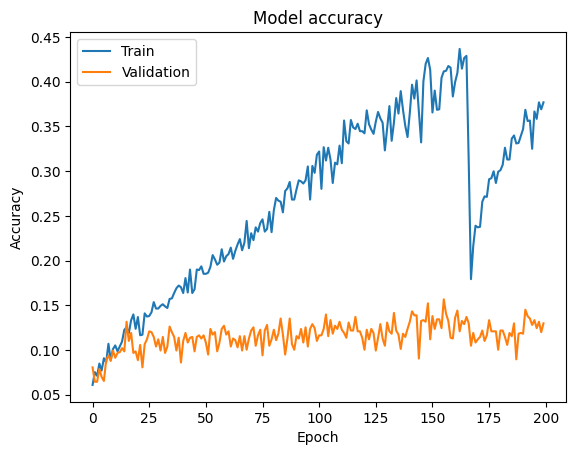

In [86]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


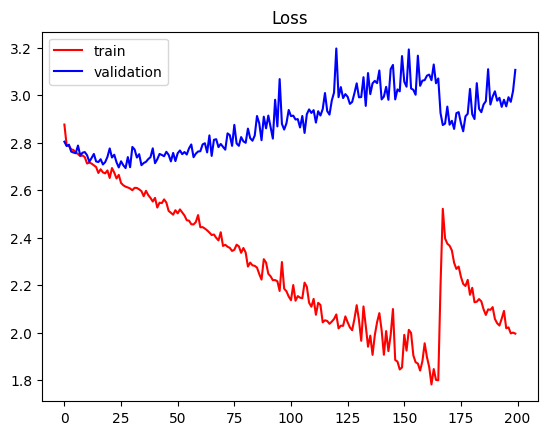

In [87]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

35/35 [==============================] - 1s 39ms/step


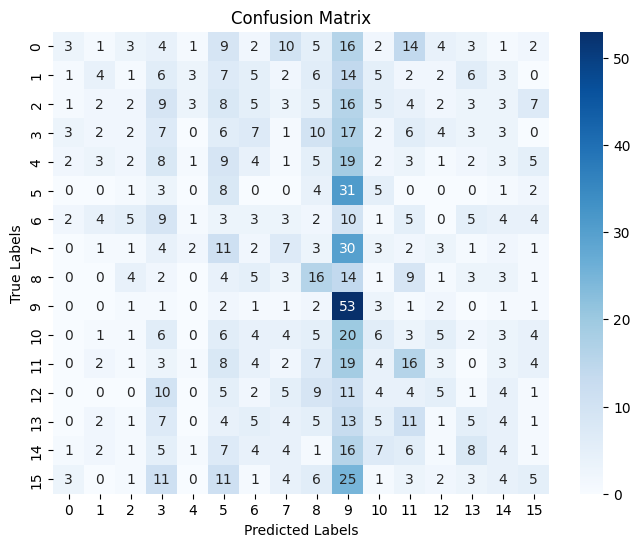

In [88]:
import seaborn as sns
# Generate confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [90]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to compute TPR, FPR, TNR, FNR, Precision, Recall, and F1-Score
def compute_metrics(cm):
    num_classes = cm.shape[0]
    tpr_list = []
    fpr_list = []
    tnr_list = []
    fnr_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(num_classes):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tnr = tn / (tn + fp)
        fnr = fn / (fn + tp)

        # Handle division by zero for precision and recall
        if tp + fp == 0:
            precision = 0
        else:
            precision = tp / (tp + fp)

        if tp + fn == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        # Handle division by zero for F1-score
        if precision + recall == 0:
            f1_score = 0
        else:
            f1_score = 2 * (precision * recall) / (precision + recall)

        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    avg_tpr = np.mean(tpr_list)
    avg_fpr = np.mean(fpr_list)
    avg_tnr = np.mean(tnr_list)
    avg_fnr = np.mean(fnr_list)
    avg_precision = np.mean(precision_list)
    avg_recall = np.mean(recall_list)
    avg_f1_score = np.mean(f1_score_list)

    return avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score

# Example usage:
# Assuming cm is the confusion matrix
avg_tpr, avg_fpr, avg_tnr, avg_fnr, avg_precision, avg_recall, avg_f1_score = compute_metrics(cm)

print("Average True Positive Rate (TPR):", avg_tpr)
print("Average False Positive Rate (FPR):", avg_fpr)
print("Average True Negative Rate (TNR):", avg_tnr)
print("Average False Negative Rate (FNR):", avg_fnr)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-Score:", avg_f1_score)


Average True Positive Rate (TPR): 0.13147239031482466
Average False Positive Rate (FPR): 0.057945092819048145
Average True Negative Rate (TNR): 0.9420549071809519
Average False Negative Rate (FNR): 0.8685276096851754
Average Precision: 0.12059946863582131
Average Recall: 0.13147239031482466
Average F1-Score: 0.1039528009107405


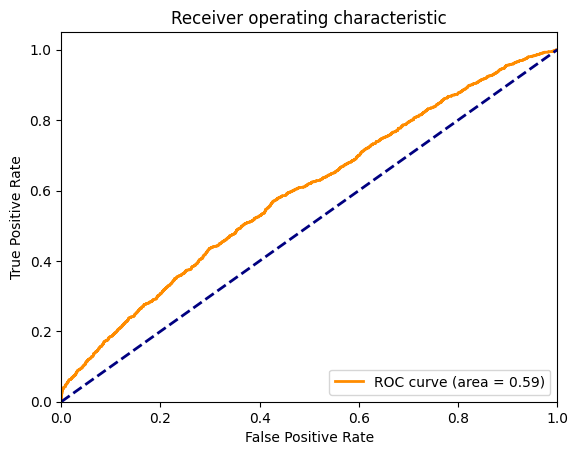

In [91]:
# Generate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()